# U.S. Oil and Gas Production Analysis

Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.


In [1]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [8]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)


,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [9]:
gas_df.shape

(121, 20)

In [10]:
gas_df.columns


Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [11]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [15]:
type(gas_df)

pandas.core.frame.DataFrame

In [35]:
Months_col = gas_df['Month']
Months_col

0      2008-06-01
1      2008-07-01
2      2008-08-01
3      2008-09-01
4      2008-10-01
          ...    
116    2018-02-01
117    2018-03-01
118    2018-04-01
119    2018-05-01
120    2018-06-01
Name: Month, Length: 121, dtype: object

In [49]:
Months_corrected = pd.to_datetime(Months_col)
Months_corrected

0     2008-06-01
1     2008-07-01
2     2008-08-01
3     2008-09-01
4     2008-10-01
         ...    
116   2018-02-01
117   2018-03-01
118   2018-04-01
119   2018-05-01
120   2018-06-01
Name: Month, Length: 121, dtype: datetime64[ns]

In [51]:
gas_df['Month'] = Months_corrected

In [57]:
month_type = gas_df['Month'].dtype

In [58]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type,
)
result.write()

In [59]:
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gidahuss/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gidahuss/code/gidahuss/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.1
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



In [60]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [61]:
gas_df['Month'].dt.month.tail()


116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

In [101]:
gas_df['Month'].dt.year

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
116    2018
117    2018
118    2018
119    2018
120    2018
Name: Month, Length: 121, dtype: int64

In [103]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()

In [106]:
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


In [107]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [108]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gidahuss/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gidahuss/code/gidahuss/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.1
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



In [109]:
%matplotlib inline
import matplotlib

<AxesSubplot:xlabel='Month'>

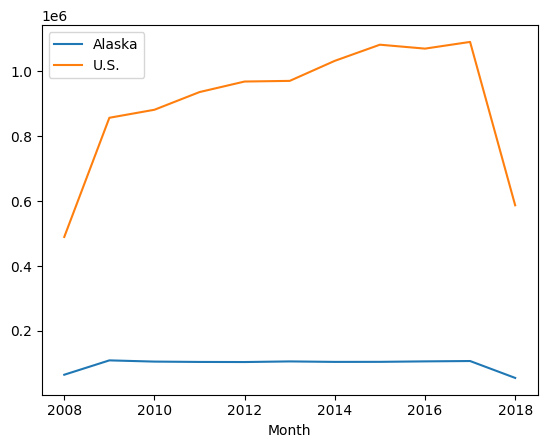

Text(0.5, 0, 'Year')

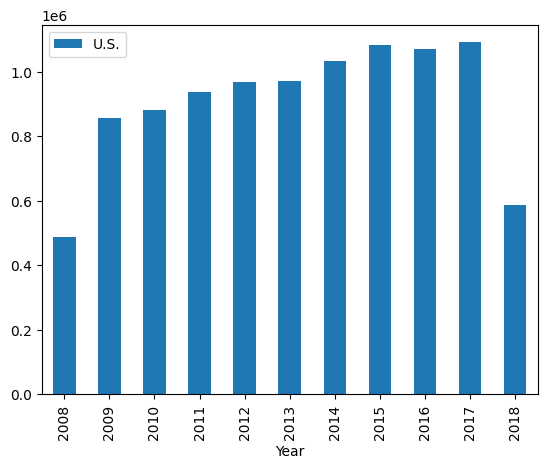

In [121]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

In [150]:
hello = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)

In [153]:
filtered_yearly_gas_df=yearly_gas_df[hello]

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


In [154]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/gidahuss/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/gidahuss/code/gidahuss/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.1
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape FAILED [100%]

=================================== FAILURES ===================================
______ TestFilteredGas.test_yearly_gas_production_df_has_the_right_shape _______

self = <test_filtered_gas.TestFilteredGas testMethod=test_yearly_gas_production_df_has_the_right_shape>

    def test_yearly_gas_production_df_has_the_right_shape(self):
>       self.assertEqual(self.result.yearly_gas, (9, 19))
E       AssertionError: Tuples differ: (11,) != (9, 19)
E       
E       First differing element 0:
E       11
E       9
E       
E       Second tuple co